In [1]:
import pandas as pd
import numpy as np
from OLSPA import f_stat as f
import statsmodels.api as sm

In [2]:
result_df = pd.DataFrame(columns=['Abs_MDE', 'r_squared', 
                                  'n_recommendation_f_stat',       'pow_est_f_stat',
                                  'n_recommendation_t_test',       'pow_est_t_test',
                                  'n_recommendation_t_test_PRESS', 'pow_est_t_test_PRESS'])

In [3]:
candidates = list(np.linspace(0, 10, 20))[1:]
candidates.sort()

In [4]:
for i in candidates:
    mde = i
    df = f.create_data(n=1000000, mu=100, sigma=25, mde=mde)
    X = df['Treated']
    X = sm.add_constant(X)
    Y = df['DV']
    model = sm.OLS(Y.astype(float), X.astype(float)).fit()
    rsquared = model.rsquared
    delta = f.extract_r_delta(df)
    f_stat_n = f.get_f_stat_n(1, delta)
    recommended_n_norm, recommended_n_press = f.acquire_sample_sizes_via_hueristic(df, mde)
    print("f-stat:{}, std:{}, PRESS:{}".format(f_stat_n, recommended_n_norm, recommended_n_press))

    f_stat_pow  = f.assess_power(df, f_stat_n, iterations = 1000)
    n_norm_pow  = f.assess_power(df, recommended_n_norm, iterations = 1000)
    n_press_pow = f.assess_power(df, recommended_n_press, iterations = 1000)

    result_df = result_df.append({'Abs_MDE' : mde, 
                                  'r_squared' : rsquared, 
                                  'n_recommendation_f_stat' : f_stat_n,      
                                  'pow_est_f_stat' : f_stat_pow,
                                  'n_recommendation_t_test' : recommended_n_norm,       
                                  'pow_est_t_test' : n_norm_pow,
                                  'n_recommendation_t_test_PRESS' : recommended_n_press, 
                                  'pow_est_t_test_PRESS' : n_press_pow}, 
                                  ignore_index=True)

/home/bknight/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


The s.e. of the regressed residuals is 24.968825925941925.
The s.e. of the regressed PRESS residuals is 24.96887586370899.
The estimated effect size via normal residuals is 0.021078916206743088.
The estimated effect size via PRESS residuals is 0.021078874048897724.
f-stat:72548, std:27829, PRESS:27830
The s.e. of the regressed residuals is 25.00111906065251.
The s.e. of the regressed PRESS residuals is 25.001169062978356.
The estimated effect size via normal residuals is 0.04210337850852567.
The estimated effect size via PRESS residuals is 0.042103294301789336.
f-stat:18458, std:6975, PRESS:6976
The s.e. of the regressed residuals is 25.000208640519954.
The s.e. of the regressed PRESS residuals is 25.000258640906875.
The estimated effect size via normal residuals is 0.0631573676494011.
The estimated effect size via PRESS residuals is 0.06315724133499512.
f-stat:7336, std:3100, PRESS:3100
The s.e. of the regressed residuals is 24.990450759221538.
The s.e. of the regressed PRESS residual

/home/bknight/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


The s.e. of the regressed residuals is 24.988259542715266.
The s.e. of the regressed PRESS residuals is 24.98830951933227.
The estimated effect size via normal residuals is 0.25275027509970893.
The estimated effect size via PRESS residuals is 0.25274976959917933.
f-stat:503, std:194, PRESS:194
The s.e. of the regressed residuals is 24.98466959660449.
The s.e. of the regressed PRESS residuals is 24.984719566005428.
The estimated effect size via normal residuals is 0.27385214107805383.
The estimated effect size via PRESS residuals is 0.2738515933741903.
f-stat:426, std:165, PRESS:165
The s.e. of the regressed residuals is 24.9785923803857.
The s.e. of the regressed PRESS residuals is 24.978642337591765.
The estimated effect size via normal residuals is 0.29498944297668234.
The estimated effect size via PRESS residuals is 0.29498885299872474.
f-stat:369, std:142, PRESS:142
The s.e. of the regressed residuals is 25.02395769304002.
The s.e. of the regressed PRESS residuals is 25.02400774107

In [5]:
result_df

,Abs_MDE,r_squared,n_recommendation_f_stat,pow_est_f_stat,n_recommendation_t_test,pow_est_t_test,n_recommendation_t_test_PRESS,pow_est_t_test_PRESS
0,0.526316,0.000108,72548.0,0.808,27829.0,0.426,27830.0,0.408
1,1.052632,0.000425,18458.0,0.788,6975.0,0.413,6976.0,0.419
2,1.578947,0.001070,7336.0,0.794,3100.0,0.446,3100.0,0.430
3,2.105263,0.001817,4318.0,0.788,1743.0,0.413,1743.0,0.462
4,2.631579,0.002903,2703.0,0.811,1113.0,0.445,1113.0,0.436
5,3.157895,0.003918,2003.0,0.797,774.0,0.423,774.0,0.393
6,3.684211,0.005357,1465.0,0.808,571.0,0.411,571.0,0.416
7,4.210526,0.007297,1075.0,0.803,437.0,0.441,437.0,0.435
8,4.736842,0.008889,882.0,0.774,344.0,0.428,344.0,0.419
9,5.263158,0.010941,717.0,0.803,279.0,0.433,279.0,0.431


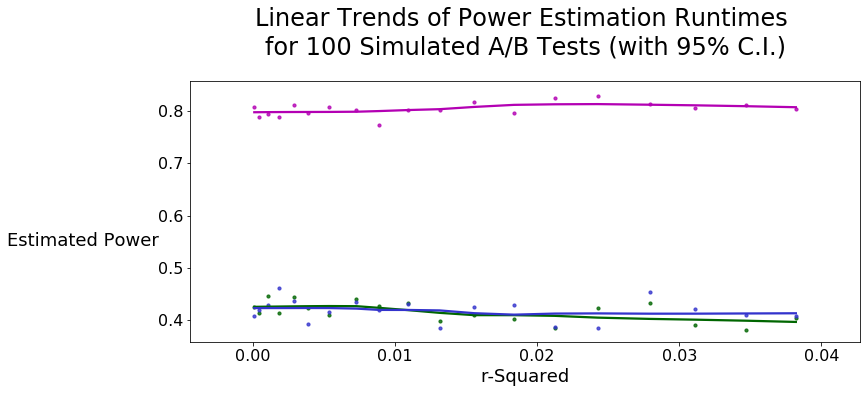

<Figure size 432x288 with 0 Axes>

In [10]:
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


fig, ax = plt.subplots()
fig.set_size_inches(12, 4.8, forward=True)



x1 = result_df['r_squared']
y1 = result_df['pow_est_f_stat']


x2 = result_df['r_squared']
y2 = result_df['pow_est_t_test']

x3 = result_df['r_squared'] 
y3 = result_df['pow_est_t_test_PRESS']

sns.regplot(x1, y1, 
            lowess=True, 
            ci=95, 
            color = '#b300b3', 
            marker='o', 
            scatter_kws={'s':10}
           )
sns.regplot(x2, y2, 
            lowess=True, 
            ci=95, 
            color = '#006600', 
            marker='o', 
            scatter_kws={'s':10}
           )
sns.regplot(x3, y3, 
            lowess=True, 
            ci=95, 
            color = '#3333cc', 
            marker='o', 
            scatter_kws={'s':10}
           )

# labels = [
#          'Isotonic Interpolation', 
#          'Binary Search (with Starting Value)', 
#          'Binary Search (Uninformed)'
#          ]
# plt.legend(labels, prop={'size': 14})
plt.title("Linear Trends of Power Estimation Runtimes \nfor 100 Simulated A/B Tests (with 95% C.I.)", 
          size = 24, y=1.08)
plt.ylabel('Estimated Power', size = 18).set_rotation(0)
plt.xlabel('r-Squared', size = 18)
# plt.xlim(0,0.01)

# ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,}'.format(int(x))))

# ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,}'.format(int(x))))

ax.tick_params(axis='both', which='major', labelsize=16)
ax.yaxis.set_label_coords(-0.16,0.35)

plt.show()
# plt.savefig('v1.png',bbox_inches='tight')
plt.clf()

In [7]:
def get_f_stat_n(u, f2, sig_level = 0.05):
    from scipy.stats import f
    from scipy import special
    from scipy.optimize import fsolve
    """Returns recommended sample size using the f-test.

    Keyword arguments:
    u  -- DF Numerator = (k-1) where k is the number of covariates + 1 for the intercept  
    f2 -- R2/(1−R2) where R2 is the coefficient of determination
    """
    def my_func(v):
        return 1-special.ncfdtr(u, v, f2*(u+v+1), f.ppf(1-sig_level, u, v))-0.8
    return int(fsolve(my_func, 1000))

In [8]:
get_f_stat_n(1, 0.038687, sig_level = 0.05)

/home/bknight/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


1000